# i. Pendahuluan

<h4>Dataset yang digunakan : </h4> 
Dataset yang digunakan adalah data harga penjualan mobil dan spesifikasinya di Jerman.
<h4>Objective : </h4>

Project ini bertujuan untuk memprediksi harga jual sebuah mobil berdasarkan dataset yang digunakan.

<h4>Dataset Source:</h4> 

https://www.kaggle.com/datasets/lucaspoo/germany-cars

<h4>Link Website Model Deployment:</h4> 

https://huggingface.co/spaces/AnandaKhairurriza/P1-Milestone2

# ii. Import Libraries

In [1]:
import numpy as np # Untuk pengolahan numerik
import pandas as pd # Untuk mengolah data tabular
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Untuk visualisasi data
import category_encoders as ce

from sklearn.model_selection import train_test_split # Untuk memisahkan train set dan test set

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder # Untuk scaling dan encoding
from sklearn.model_selection import GridSearchCV # Untuk pencarian hyperparameter tuning

from sklearn.pipeline import Pipeline # Untuk membuat pipeline

from sklearn.linear_model import LinearRegression # Untuk modeling menggunakan Linear Regression
from sklearn.neighbors import KNeighborsRegressor # Untuk modeling menggunakan KNN
from sklearn.tree import DecisionTreeRegressor # Untuk modeling menggunakan Decision Tree
from sklearn.ensemble import RandomForestRegressor # Untuk modeling menggunakan Random Forest
from sklearn.ensemble import AdaBoostRegressor # Untuk modeling menggunakan Ada Boost

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Untuk evaluasi menggunakan metriks MAE

import pickle # Untuk menyimpan library binary
import json # Untuk menyimpan library non binary

# iii. Data Loading
Pada tahap ini dilakukan penyiapan dataset (load, periksa ukuran) sebelum dilakukan analisis dan pengolahan.

In [10]:
# Load data csv
df = pd.read_csv("dataset.csv")

In [11]:
# Menampilkan 10 data awal
df.head(10)

,make,model,year,mileage,hp,gear,fuel,price
0,Volkswagen,up,2019,31997,60,manual,gasoline,10190
1,Volkswagen,Polo,2022,100,95,manual,gasoline,24390
2,Volkswagen,Golf,2019,44607,116,manual,diesel,18630
3,Volkswagen,Tiguan,2019,42934,150,automatic,diesel,29990
4,Volkswagen,T6 Multivan,2021,10645,204,automatic,diesel,79890
5,Volkswagen,California,2021,0,114,automatic,gasoline,44393
6,Volkswagen,T-Roc,2021,8963,150,automatic,gasoline,34895
7,Volkswagen,Golf Variant,2019,96485,116,manual,diesel,17590
8,Volkswagen,Polo,2018,29732,116,automatic,gasoline,18980
9,Volkswagen,Sharan,2020,28840,177,automatic,diesel,44570


In [12]:
# Menampilkan 10 data terakhir
df.tail(10)

,make,model,year,mileage,hp,gear,fuel,price
144830,Volvo,XC 60,2019,0,197,automatic,gasoline,62250
144831,Volvo,XC 90,2015,70555,401,automatic,Hybrid - gasoline,51890
144832,Volvo,XC 60,2015,0,197,automatic,gasoline,61900
144833,Volvo,XC 60,2021,0,197,automatic,diesel,65910
144834,Volvo,XC 60,2016,0,197,automatic,gasoline,58590
144835,Volvo,XC 60,2022,0,197,automatic,gasoline,61900
144836,Volvo,XC 60,2022,0,197,automatic,diesel,61390
144837,Volvo,XC 60,2019,90321,235,automatic,diesel,34880
144838,Volvo,XC 60,2019,0,197,automatic,diesel,58990
144839,Volvo,XC 90,2021,0,235,automatic,diesel,93000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144840 entries, 0 to 144839
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   make     144840 non-null  object
 1   model    144840 non-null  object
 2   year     144840 non-null  int64 
 3   mileage  144840 non-null  int64 
 4   hp       144840 non-null  int64 
 5   gear     144840 non-null  object
 6   fuel     144840 non-null  object
 7   price    144840 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.8+ MB


Berdasarkan informasi dataset, dari 8 kolom sebanyak 4 kolom bertype numerik dan 4 kolom bertype string/object. Selain itu tidak ada data null pada dataset ini. Kemudian berikut adalah informasi dari setiap kolom pada dataset:
<ul>
    <li><b>make : </b>Merek mobil</li>
    <li><b>model : </b>Nama model dari mobil</li>
    <li><b>year : </b>Tahun registrasi</li>
    <li><b>mileage : </b>Jarak yang telah ditempuh oleh mobil tersebut (dalam km)</li>
    <li><b>hp : </b>Ukuran tenaga kuda (hp) dari mobil tersebut</li>
    <li><b>gear : </b>Transmisi yang digunakan (otomatis/manual)</li>
    <li><b>fuel : </b>Jenis bahan bakar yang digunakan</li>
    <li><b>price : </b>Harga mobil</li>
</ul>

In [14]:
df.describe()

,year,mileage,hp,price
count,144840.000000,144840.000000,144840.000000,1.448400e+05
mean,2020.022397,23922.474579,176.288449,3.773257e+04
std,1.715864,28190.574548,88.576224,2.508925e+04
min,2012.000000,0.000000,1.000000,5.549000e+03
25%,2019.000000,20.000000,120.000000,2.347000e+04
50%,2020.000000,14090.000000,150.000000,3.170300e+04
75%,2021.000000,37147.500000,197.000000,4.399000e+04
max,2022.000000,150000.000000,843.000000,1.550000e+06


Dari informasi kolom numerik pada dataset, rata-rata horsepower mobil pada dataset ini adalah 176 hp. Artinya sebagian besar mobil pada dateset ini berjenis midsize (sekitar 170 hp)

In [15]:
# Cek ukuran data
df.shape

(144840, 8)

Dari hasil ukuran, dataset ini memiliki 144.840 data/row dan 8 kolom.

In [16]:
# Copy dataset ke variabel baru
df_copy = df.copy()

# iv. Exploratory Data Analysis (EDA)
Pada tahap ini dilakukan eksplorasi terhadap dataset untuk mengetahui informasi data lebih detail.

#### Mengetahui perbandingan transmisi/gear pada mobil di dataset

([<matplotlib.patches.Wedge at 0x135061e9c90>,
 [Text(-0.4846228652086002, 0.9874921156733389, 'automatic'),
  Text(0.4846228652086001, -0.9874921156733389, 'manual')],
 [Text(-0.26433974465923643, 0.5386320630945485, '64.5%\n(93454)'),
  Text(0.2643397446592364, -0.5386320630945485, '35.5%\n(51386)')])

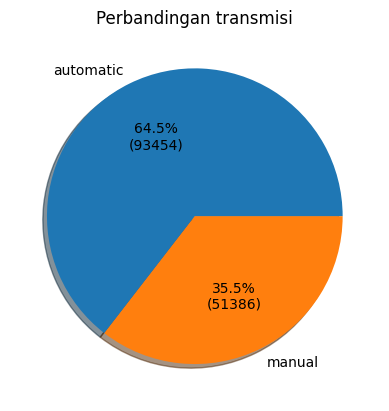

In [17]:
def fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, len(df_copy)*x/100)

de_cmp = df_copy["gear"].value_counts()
plt.title("Perbandingan transmisi")
plt.pie(de_cmp, labels=de_cmp.index, shadow = True, autopct=fmt)

Dari hasil pie chart, sebanyak 93.454 mobil (64,5% dari dataset) adalah mobil dengan gear otomatis. Dan sebanyak 51.386 mobil (35,5% dari dataset) adalah mobil dengan gear manual.

#### Melihat persebaran tahun rilis mobil

<AxesSubplot: ylabel='year'>

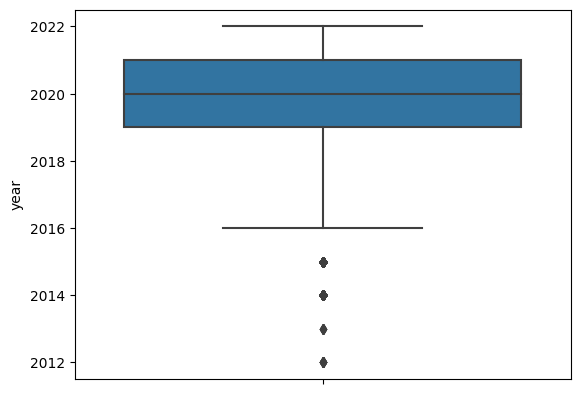

In [18]:
sns.boxplot(data=df_copy, y=df_copy.year)

Dari hasil boxplot, sebagian besar mobil pada dataset adalah mobil keluaran tahun 2019 sampai 2021.

### Melihat rata-rata harga mobil berdasarkan brand

Text(0.5, 0, 'Brand')

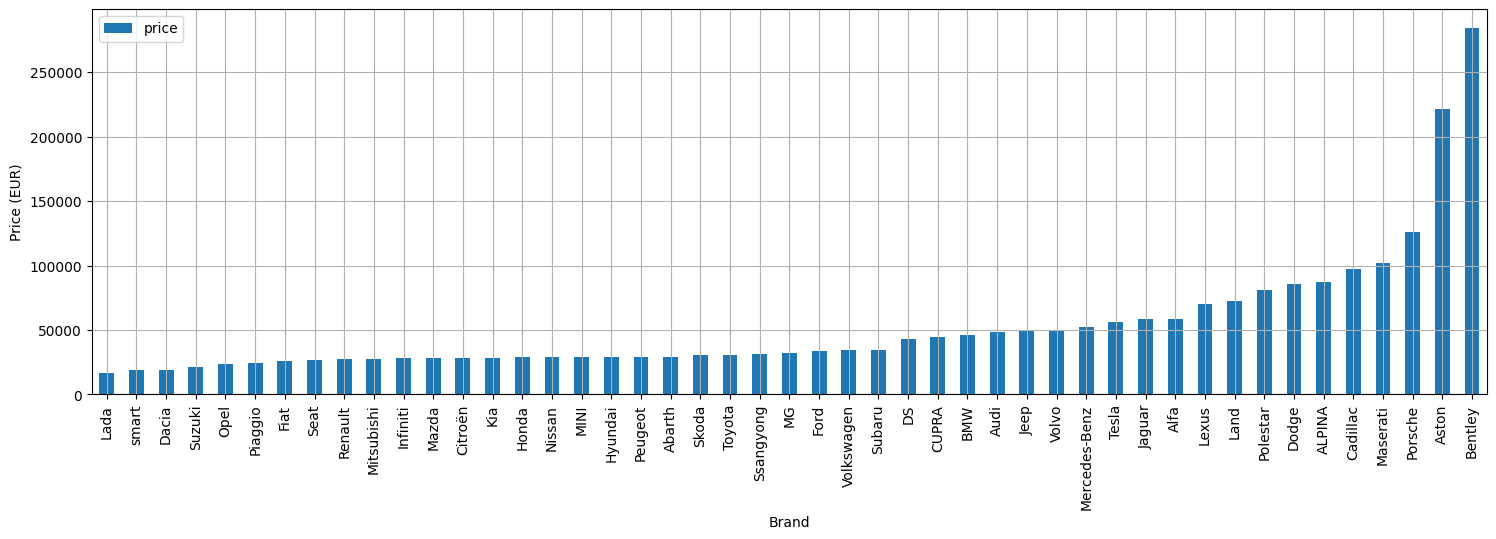

In [19]:
prm_df = pd.DataFrame(df_copy[["make", "price"]].groupby("make")["price"].mean().sort_values())
prm_df.plot(kind="bar", figsize=(18,5), grid=True)
plt.ylabel("Average car price (EUR)")
plt.ylabel("Price (EUR)")
plt.xlabel("Brand")

Berdasarkan bar chart, brand Bentley memiliki rata-rata harga mobil paling tinggi dibandingkan dengan brand lainnya (diatas 250.000 Euro). Sedangkan brand Lada memiliki rata-rata harga mobil paling rendah dibandingkan brand lainnya.

#### Melihat jumlah mobil berdasarkan bahan bakar

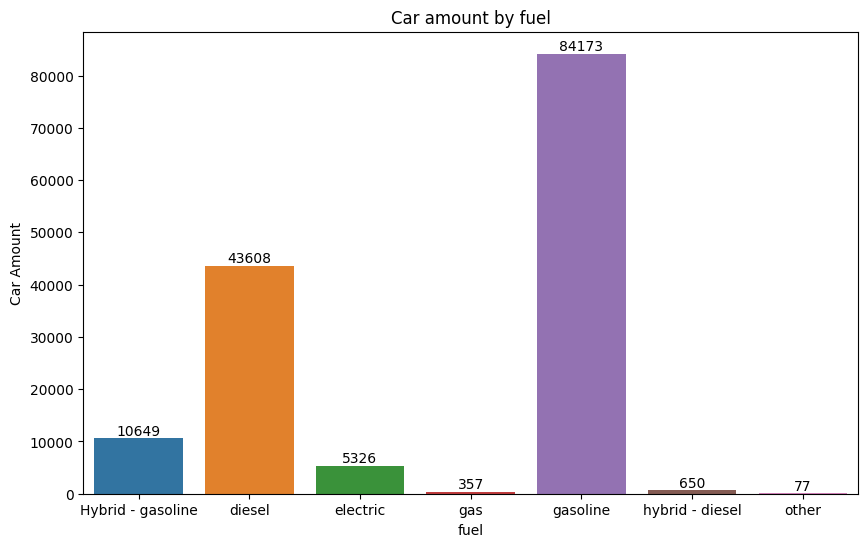

In [20]:
fuel_df = pd.DataFrame(df_copy.groupby("fuel")["fuel"].count())
plt.figure(figsize=(10,6))
fuel_b = sns.barplot(data=fuel_df, x=fuel_df.index, y=fuel_df.fuel)
plt.ylabel("Car Amount")
plt.title("Car amount by fuel")
for i in fuel_b.containers:
    fuel_b.bar_label(i,)

Dari hasil bar chart, sebagian besar mobil pada dataset adalah mobil yang berbahan bakar bensin (gasoline).

#### Perbandingan antara harga mobil dan mileage (jarak yang sudah ditempuh mobil)

<AxesSubplot: xlabel='mileage', ylabel='price'>

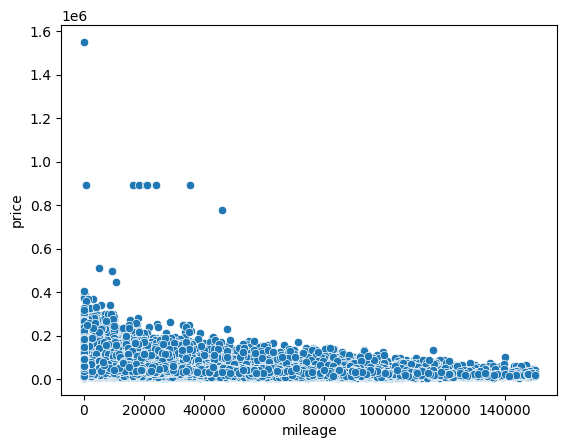

In [21]:
sns.scatterplot(data=df_copy, x=df_copy.mileage, y=df_copy.price)

Dari hasil perbandingan, sebagian besar mobil yang telah dipakai dalam jarak yang semakin jauh maka harga mobil tersebut cenderung turun. Artinya mobil yang telah dipakai (bekas/second) harganya lebih murah dibandingkan mobil baru.

# v. Feature Engineering

Tahap ini berisi proses penyiapan data untuk training model, seperti pembagian data menjadi train-test set, normalisasi, encoding, dan sebagainya.

#### Train test split
Pada tahap ini akan dilakukan pemisahan fitur untuk train set dan test set

In [22]:
# Pemisahan fitur dan target
X = df_copy.drop(columns=["price"], axis=1) # Fitur
y = df_copy["price"] # Target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=7) # Split dengan ukuran 85% train dan 15% test
print("Train size : ", X_train.shape[0]) # Jumlah data Train set
print("Test size : ", X_test.shape[0]) # Jumlah data Test set

Train size :  123114
Test size :  21726


Dari hasil split train dan test, sebanyak 123.114 data (85%) yang akan dijadikan sebagai training model dan 21.726 data (15%) yang akan dijadikan sebagai testing model.

#### Handling missing value
Pada tahap ini dilakukan pengecekan data null pada dataset dan dilakukan treatment pada data null tersebut.

In [24]:
# Cek data null pada fitur train
check = X_train.isnull().sum().sort_values(ascending=False)
check

make       0
model      0
year       0
mileage    0
hp         0
gear       0
fuel       0
dtype: int64

In [25]:
# Cek data null pada fitur test
check = X_test.isnull().sum().sort_values(ascending=False)
check

make       0
model      0
year       0
mileage    0
hp         0
gear       0
fuel       0
dtype: int64

In [26]:
# Cek data null pada target train
check = y_train.isnull().sum()
check

0

In [27]:
# Cek data null pada target test
check = y_test.isnull().sum()
check

0

Dari hasil pengecekan missing value tidak ada data null pada train maupun data test. Kesimpulannya tidak ada data null pada dataset.

#### Handling Outlier
Pada tahap ini dilakukan pengecekan data menyimpang (outlier) pada dataset dan dilakukan treatment pada data outlier tersebut.

In [28]:
# Ambil list fitur numerik untuk handling outlier

num_col = ["mileage", "hp"]

In [29]:
# Deteksi outlier
for c in num_col:
    IQR = X_train[c].quantile(0.75) - X_train[c].quantile(0.25)

    batas_atas = X_train[c].quantile(0.75) + (1.5 * IQR)
    batas_bawah = X_train[c].quantile(0.25) - (1.5 * IQR)
    print(c)
    print("Batas atas : ", batas_atas)
    print("Batas bawah : ", batas_bawah)
    print("Data diatas batas atas : {}".format(len(X_train[X_train[c] > batas_atas])))
    print("Data dibawah batas bawah : {}".format(len(X_train[X_train[c] < batas_bawah])))
    print("Value maks : ", X_train[c].max())
    print("Value min : ", X_train[c].min())
    print("\n")

mileage
Batas atas :  92873.75
Batas bawah :  -55692.25
Data diatas batas atas : 3919
Data dibawah batas bawah : 0
Value maks :  150000
Value min :  0


hp
Batas atas :  312.5
Batas bawah :  4.5
Data diatas batas atas : 8859
Data dibawah batas bawah : 14
Value maks :  843
Value min :  1




Output diatas adalah hasil deteksi outlier pada data numerik. Secara asumsi outlier tersebut bukan termasuk data yang anomali, karena bisa saja karakteristik mobil mencapai value outlier tersebut. Sehingga outlier pada dataset ini tidak akan dihandle.

#### Feature selection
Pada tahap ini dilakukan fitur yang dipilih untuk dilakukan modeling.

Menurut sebuah artikel (https://www.capitalone.com/cars/learn/managing-your-money-wisely/factors-that-can-affect-used-car-tradein-value/1224), faktor yang mempengaruhi harga sebuah mobil adalah :

<ul>
    <li>Usia penjualan mobil, umumnya harga mobil turun sebesar 20% - 30% pada setahun pertama. Kemudian dalam 5 tahun harganya dapat mencapai 60% dari harga awalnya.</li><br>
    <li>Jarak tempuh mobil, untuk mobil bekas semakin tinggi jarak yang telah ditempuh oleh mobil tersebut maka harga jualnya cenderung menurun.</li><br>
    <li>Kondisi mobil saat dijual, bila kondisi mobil terlihat berkarat di beberapa bagian, tergores, atau kotor akan memiliki harga jual yang murah. Semakin banyak kekurangan mobil yang akan dijual, semakin rendah pula harga jualnya.</li><br>
    <li>Spesifikasi mobil, jenis mesin ataupun transmisi dapat mempengaruhi harga mobil. Contohnya mobil yang menggunakan transimisi otomatis umumnya memiliki harga yang lebih tinggi dibandingkan dengan yang manual.</li>
</ul>

Maka berdasarkan pertimbangan tersebut, fitur yang tidak diperlukan adalah nama brand dan nama model dari mobil tersebut.

In [30]:
# Drop kolom/fitur yang dianggap tidak dibutuhkan
X_train.drop(columns=["make", "model"], axis=1, inplace=True)
X_test.drop(columns=["make", "model"], axis=1, inplace=True)

X_train

,year,mileage,hp,gear,fuel
58595,2022,0,150,manual,gasoline
70172,2020,14707,95,manual,gasoline
46097,2020,32960,462,automatic,Hybrid - gasoline
132051,2021,27166,75,manual,gasoline
91490,2021,10,140,manual,gasoline
...,...,...,...,...,...
66455,2020,7060,163,automatic,gasoline
53459,2019,16900,71,manual,gasoline
10742,2018,54200,190,automatic,diesel
49689,2021,8305,110,manual,gasoline


In [31]:
num_columns = ["mileage", "hp"] # Fitur numerik
cat_columns = ["gear", "fuel"] # Fitur kategorikal
cat_num_columns = ["year"] # Fitur kategorikal berbentuk numerik

#### Feature Scaling

Pada tahap ini dilakukan scaling pada fitur yang numerik. Karena pada data ini fitur numeriknya memiliki pengukuran yang berbeda-beda

In [32]:
# Scaling numerik dengan Min Max Scaler
scaler = MinMaxScaler()
scaler.fit(X_train[num_columns])

X_train_num_scaled = scaler.transform(X_train[num_columns])
X_test_num_scaled = scaler.transform(X_test[num_columns])

X_train_num_scaled

array([[0.        , 0.17695962],
       [0.09804667, 0.11163895],
       [0.21973333, 0.54750594],
       ...,
       [0.36133333, 0.22446556],
       [0.05536667, 0.12945368],
       [0.16410667, 0.12945368]])

#### Feature Encoding
Pada tahap ini dilakukan encoding pada fitur kategorikal. Tujuannya untuk convert fitur kategorikal (string) ke dalam bentuk numerik. Untuk fitur kategorikal di encode menggunakan one hot encoder. Kemudian karena year sudah berbentuk numerik maka tidak perlu di encoding.

In [33]:
# Encode kategorikal dengan One Hot Encoder
encoder = ce.OneHotEncoder(use_cat_names=True, handle_unknown="ignore")
encoder.fit(X_train[cat_columns])

X_train_cat_encoded = encoder.transform(X_train[cat_columns])
X_test_cat_encoded = encoder.transform(X_test[cat_columns])

cat_encoded_columns = X_test_cat_encoded.columns.tolist()

X_train_cat_encoded

c:\Users\user\PythonVirtualEnvironment\MyEnvironment\Lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
c:\Users\user\PythonVirtualEnvironment\MyEnvironment\Lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


,gear_manual,gear_automatic,fuel_gasoline,fuel_Hybrid - gasoline,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid - diesel,fuel_other
58595,1,0,1,0,0,0,0,0,0
70172,1,0,1,0,0,0,0,0,0
46097,0,1,0,1,0,0,0,0,0
132051,1,0,1,0,0,0,0,0,0
91490,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
66455,0,1,1,0,0,0,0,0,0
53459,1,0,1,0,0,0,0,0,0
10742,0,1,0,0,1,0,0,0,0
49689,1,0,1,0,0,0,0,0,0


#### Merge/Concate antara fitur yang sudah di scaling dan encoding

In [34]:
# Menggabungkan fitur yang sudah di scaling dan di encoding
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded, X_train[cat_num_columns]], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded, X_test[cat_num_columns]], axis=1)

X_train_final

array([[0.00000000e+00, 1.76959620e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.02200000e+03],
       [9.80466667e-02, 1.11638955e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.02000000e+03],
       [2.19733333e-01, 5.47505938e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.02000000e+03],
       ...,
       [3.61333333e-01, 2.24465558e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.01800000e+03],
       [5.53666667e-02, 1.29453682e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.02100000e+03],
       [1.64106667e-01, 1.29453682e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.02200000e+03]])

In [35]:
# Convert ke Dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_encoded_columns + cat_num_columns])
X_train_final_df

,mileage,hp,gear_manual,gear_automatic,fuel_gasoline,fuel_Hybrid - gasoline,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid - diesel,fuel_other,year
0,0.000000,0.176960,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022.0
1,0.098047,0.111639,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
2,0.219733,0.547506,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020.0
3,0.181107,0.087886,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0
4,0.000067,0.165083,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123109,0.047067,0.192399,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
123110,0.112667,0.083135,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0
123111,0.361333,0.224466,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0
123112,0.055367,0.129454,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0


# vi. Model Definition

Pada project ini, beberapa algoritma yang akan digunakan untuk pemodelan adalah :
<ul>
    <li>Linear Regression</li>
    <li>SVM</li>
    <li>Decision Tree</li>
    <li>Random Forest</li>
    <li>AdaBoost</li>
</ul>

#### Linear Regression

Linear Regression adalah metode untuk mengetahui hubungan/korelasi antara variabel dependen (y) dengan satu atau lebih variabel independen (x). Algoritma ini biasanya digunakan untuk mencari nilai prediksi dengan menggunakan nilai data yang sudah ada. Hubungan antar variabel dimodelkan dalam bentuk persamaan. Persamaan sederhana dari Linear Regression adalah:

## $$y = 	β₀ + β₁ Xᵢ $$

Dimana :\
y = variabel dependen\
β₀ = intercept atau perpotongan garis linear dengan sumbu y / nilai dari y saat x = 0\
β₁ = koefisien atau slope\
X = variabel independen

Jika hasil prediksi dipengaruhi oleh lebih dari satu variabel, maka persamaan Linear Regressionnya adalah:

## $$y = 	β₀ + β₁ X₁ + β₂ X₂ + ... + βᵢ Xᵢ $$

Dimana :\
y = variabel dependen\
β₀ = intercept atau perpotongan garis linear dengan sumbu y / nilai dari y saat x = 0\
β₁ = koefisien atau slope\
X = variabel independen

#### K-nearest neighbors (KNN)

KNN merupakan salah satu algoritma dalam machine learning yang dapat dikatakan paling sederhana, karena KNN akan memulai learning ketika ada data baru. Cara kerja KNN adalah menghitung jarak dari data baru ke setiap data yang ada, lalu algoritma akan memilih jarak terdekat dari data baru ke setiap data sebanyak K (angka yang ditentukan), Kemudian data baru akan diprediksi berdasarkan jenis class terbanyak dari K yang ditentukan.

<img src="https://miro.medium.com/max/1400/0*ksMa1Of3NFCvHo_Y" alt="knn-illust">

Image source : https://pub.towardsai.net/k-nearest-neighbors-knn-algorithm-tutorial-machine-learning-basics-ml-ec6756d3e0ac

#### Decision Tree

Decision Tree adalah algoritma machine learning yang cara kerjanya membagi data secara berlanjut berdasarkan parameter tertentu. Proses pembagiannya secara ilustrasi seperti pohon (dibagi menjadi 2 bagian), dan pohon dapat dijelaskan dengan dua entitas yaitu decision node dan leaves. Dimana leaves adalah sebuah keputusan/keputusan akhir, dan decision node adalah dimana sebuah data dipisahkan. Decision node sendiri terbagi menjadi root node dan child node, root node adalah pemisahan data pada bagian paling awal/atas, dan child node adalah pembagian setelah dan seterusnya dari root node.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" alt="decision-tree-illust">

Image source : https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm

#### Random Forest

Random forest adalah algoritma machine learning yang menggabungkan output dari beberapa decision tree untuk mencapai suatu hasil. Setiap tree pada Random Forest akan mengeluarkan sebuah prediksi kategori. Prediksi kategori yang terbanyak menjadi kandidat prediksi pada model. Cara kerja random forest adalah membuat sejumlah tree dari yang ditentukan kemudian didapatkan hasil dari setiap decision tree. Selanjutnya melakukan voting dari keseluruhan output decision tree (target klasifikasi menggunakan modus, target regresi menggunakan mean). Kemudian algoritma akan memilih hasil prediksi akhir dari voting terbanyak.

<img src="https://files.ai-pool.com/a/3406775c0c6f8fd9f8701c7ca671dad9.png">

Image source : https://ai-pool.com/a/s/random-forests-understanding

#### AdaBoost

AdaBoost (Adaptive Boost) adalah algoritma machine learning yang menggunakan bagging dan boosting untuk mengembangkan peningkatan akurasi prediksi. Sama seperti random forest, algoritma ini juga menggunakan beberapa decision tree untuk memperoleh data prediksi. Walaupun mirip dengan random forest, algoritma ini memiliki beberapa perbedaan dengan random forest. Perbedaan pertama adalah AdaBoost membangun stumps forest. Stumps adalah pohon yang hanya terbuat dari satu cabang dan dua daun. Kedua, stumps yang dibangun tidak memiliki bobot yang sama pada prediksi akhir. Artinya, stumps yang memiliki error besar memiliki pengaruh yang kecil saat pengambilan keputusan. Perbedaan yang terakhir adalah urutan pembuatan stumps sangat penting karena setiap stumps bertujuan untuk mengurangi error yang dihasilkan oleh stumps sebelumnya. 

In [36]:
# Membuat pipeline masing-masing model

pipe_lr = Pipeline([("lr", LinearRegression())])
pipe_knn = Pipeline([("lr", KNeighborsRegressor())])
pipe_dt = Pipeline([("dt", DecisionTreeRegressor(random_state=7))])
pipe_rf = Pipeline([("rf", RandomForestRegressor(random_state=7))])
pipe_ab = Pipeline([("ab", AdaBoostRegressor(random_state=7))])

# vii. Model Training

In [37]:
# Fit train set dengan pipe Linear Regression
pipe_lr.fit(X_train_final, y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [38]:
# Fit train set dengan pipe KNN
pipe_knn.fit(X_train_final, y_train)

Pipeline(steps=[('lr', KNeighborsRegressor())])

In [39]:
# Fit train set dengan pipe Decision Tree
pipe_dt.fit(X_train_final, y_train)

Pipeline(steps=[('dt', DecisionTreeRegressor(random_state=7))])

In [40]:
# Fit train set dengan pipe Random Forest
pipe_rf.fit(X_train_final, y_train)

Pipeline(steps=[('rf', RandomForestRegressor(random_state=7))])

In [41]:
# Fit train set dengan pipe AdaBoost
pipe_ab.fit(X_train_final, y_train)

Pipeline(steps=[('ab', AdaBoostRegressor(random_state=7))])

# viii. Model Evaluation

#### Hasil skor setiap model

In [42]:
# Tampilkan score tiap model

score_lr = pipe_lr.score(X_test_final, y_test)
score_knn = pipe_knn.score(X_test_final, y_test)
scpre_dt = pipe_dt.score(X_test_final, y_test)
score_rf = pipe_rf.score(X_test_final, y_test)
score_ab = pipe_ab.score(X_test_final, y_test)

score_list = [np.round(score_lr,3), np.round(score_knn,3), np.round(scpre_dt,3), np.round(score_rf,3), np.round(score_ab,3)]

model_list = ["Linear Regression", "KNN", "Decisiion Tree", "Random Forest", "AdaBoost"]

d = {"Score" : score_list}

df_score = pd.DataFrame(data=d, index=model_list)
df_score

,Score
Linear Regression,0.673
KNN,0.763
Decisiion Tree,0.780
Random Forest,0.819
AdaBoost,0.302


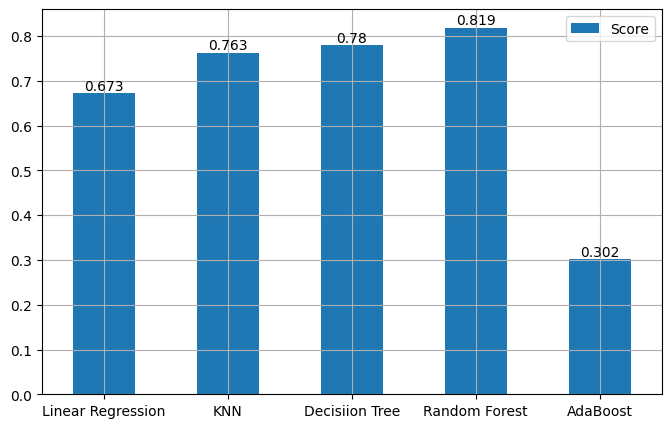

In [35]:
# Visualisasi skor
score_b = df_score.plot(kind="bar", grid=True, figsize=(8,5))
plt.xticks(rotation="horizontal")

for i in score_b.containers:
    score_b.bar_label(i,)

Dari hasil skor setiap model, algoritma Random Forest memiliki nilai skor paling tinggi dibandingkan algorima lainnya (0.819). Maka algoritma ini selanjutnya yang akan dipilih untuk menjadi base model dan dilakukan hyperparameter tuning yang diharapkan dapat meningkatkan lagi skornya.

#### Hyperparameter tuning

In [43]:
# Pencarian hyperparameter dengan Manual Search

pipe_rf_kai = Pipeline([("rf_kai", RandomForestRegressor(random_state=7, n_estimators=500, max_depth=30, min_samples_leaf=4, min_samples_split=10))])
pipe_rf_kai.fit(X_train_final, y_train)

score_rf_kai = pipe_rf_kai.score(X_test_final, y_test)

In [44]:
# Perbandingan score
print("Random forest score: {:.3f}".format(score_rf))
print("Random forest tuned score: {:.3f}".format(score_rf_kai))

Random forest score: 0.819
Random forest tuned score: 0.827


Dari hasil tuning yang dilakukan, terjadi peningkatan score yang sebelumnya 0.819 menjadi 0.827. Artinya hyperparameter tuning meningkatkan keakuratan prediksi model terhadap nilai aktualnya.

In [45]:
# Prediksi dengan model final
pred_train_kai = pipe_rf_kai.predict(X_train_final)
pred_test_kai = pipe_rf_kai.predict(X_test_final)

In [46]:
# Dataframe komparasi
df_pred = pd.DataFrame(pred_test_kai, index=y_test.index, columns=["price prediction"])
df_cmp = pd.concat([y_test, df_pred], axis=1)
df_cmp

,price,price prediction
15561,33930,35424.561768
121559,29820,24581.662739
125778,43760,61477.428198
117637,28990,27615.523820
43669,21780,21587.429997
...,...,...
91551,25988,29828.214938
125511,27970,29615.077091
81045,14930,15585.483221
79651,32790,37277.424807


In [47]:
# Tampilkan nilai mean absolute error pada train dan test set
print("MAE score train: {:.3f}".format(mean_absolute_error(y_train, pred_train_kai)))
print("MAE score test: {:.3f}".format(mean_absolute_error(y_test, pred_test_kai)))
print("\n")
print("Mean train target: {:.3f}".format(y_train.mean()))
print("Mean test target: {:.3f}".format(y_test.mean()))

MAE score train: 3950.631
MAE score test: 4881.934


Mean train target: 37706.436
Mean test target: 37880.644


Dari hasil yang didapat, nilai MAE/rata-rata kesalahan pada train set adalah 3950.63. Kemudian nilai MAE/rata-rata kesalahan pada test set adalah 4881.93. Dapat dikatakan nilai error tersebut masih tergolong rendah berdasarkan rata-rata nilai pada train dan test set (sekitar 37 ribu). Kemudian jarak/rentang kesalahan antara train dan test masih belum tinggi. Sehingga prediksi model tergolong good-fit.

# ix. Model Saving

Pada tahap ini dilakukan penyimpanan model dan pengetesan menggunakan data inference set (data diluar train dan test). Penyimpanan dan load menggunakan library pickle (untuk menyimpan library binary) dan json.

In [48]:
# Menyimpan model dan fitur dengan pickle dan json

with open("model.pkl", "wb") as file_1:
    pickle.dump(pipe_rf_kai, file_1)

with open("scaler.pkl", "wb") as file_2:
    pickle.dump(scaler, file_2)

with open("encoder.pkl", "wb") as file_3:
    pickle.dump(encoder, file_3)

with open("list_num_cols.txt", "w") as file_4:
    json.dump(num_columns, file_4)

with open("list_cat_cols.txt", "w") as file_5:
    json.dump(cat_columns, file_5)

with open("list_cat_num_cols.txt", "w") as file_6:
    json.dump(cat_num_columns, file_6)

# x. Model Inference

Pada tahap ini dilakukan pengetesan menggunakan data inference set (data diluar train dan test). Untuk pengetesan prediksi inference dapat dilihat pada inference_set.ipynb

# xi. Pengambilan Kesimpulan

Dari hasil modeling yang telah dilakukan setelah dievaluasi menggunakan Pipe score dan Mean Absolute Error, model yang telah dirancang termasuk good-fit. Artinya model sudah cukup baik untuk melakukan prediksi harga mobil baik di train-set maupun test-set. Hasil prediksi yang baik dapat dikatakan pemilihan fiturnya sudah cocok, artinya harga sebuah mobil adalah dengan berdasarkan tahun registrasi, mileage, dan juga spesifikasi mobil tersebut seperti transmisi, jenis mesin, dan jenis bahan bakar yang digunakan.  Beberapa hal teknis yang mempengaruhi akurasi dari prediksi yang dilakukan model adalah:
<ul>
    <li>Split train-set dan test-set. Pada pemisahan data yang digunakan untuk melatih dan mengetest model perlu diperhatikan. Jika jumlah data train lebih sedikit dibandingkan data test, maka akurasi akan cenderung menurun karena dapat dianggap kurang data untuk melatih model.</li><br>
    <li>Pemilihan fitur. Dilakukan seleksi fitur yang sekiranya cocok untuk melatih model. Pemilihan bisa dengan uji korelasi seperti pearson/random forest/dan sebagainya atau pemilihan secara subjektif.</li><br>
    <li>Handling missing value. Ada berbagai macam cara untuk menangani missing value seperti CCA, mean median inputation, random input. Pemilihan metode ini dapat mempengaruhi akurasi prediksi model.</li><br>
    <li>Handling outlier. Ada berbagai macam cara juga untuk menangani outlier pada data, mulai dari trimming atau censoring. Apabila outlier tidak berdampak besar pada data atau outlier tersebuat adalah data alami (bukan error) maka dapat dihiraukan. Beberapa algoritma modeling sensitif terhadap outlier, contohnya Linear Regression. Karena pada kasus ini outlier tidak dihandle maka score dari algoritma tersebut cenderung rendah.</li><br>
    <li>Scaling fitur. Sebelum dilakukan model train perlu dilakukan scaling pada fitur numerik. Tujuannya adalah untuk melakukan penskalaan pada setiap fitur numerik karena umumnya setiap fitur memiliki rentangnya masing-masing, selain itu scaling juga dapat meningkatkan akurasi dari model. Scaling yang dilakukan untuk fitur yang distribusinya normal dapat menggunakan Standard Scaler. Lalu untuk yang distribusinya tidak normal/skew dapat menggunakan Min Max Scaler. Kemudian jika skewnya ekstrim dapat menggunakan Robust Scaling</li><br>
    <li>Encoding fitur. Selain scaling, untuk fitur kategorikal perlu dilakukan encoding. Training model akan bermasalah jika kategorikal tidak diencoding karena pada dasarnya pada proses machine learning hanya menerima data dalam bentuk numerik (tidak bisa dalam bentuk string), sehingga string perlu diubah kedalam bentuk numerik. Untuk encoding kategorikal yang tidak ada tingkatannya dapat menggunakan One Hot Encoder, kemudian jika ada tingkatannya dapat menggunakan Ordinal Encoder atau Label Encoder.</li><br>
    <li>Pemilihan algoritma modeling. Algoritma seperti Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, dsb. memiliki cara kerja untuk training dan prediction yang berbeda-beda. Sehingga hasil akurasi prediksi setiap algoritma berbeda-beda.</li><br>
    <li>Pengaturan Hyperparameter Tuning. Pengaturan untuk memodifikasi cara kerja algoritma dapat dikatakan opsi terakhir untuk mengubah akurasi dari sebuah model. Terkadang pengaturan default dari suatu algoritma tidak lebih baik jika belum dilakukan hyperparameter tuning. Pencarian pengaturan tuning yang tepat dapat dengan cara manual maupun grid search ataupun random search.</li><br>
</ul>